<a href="https://colab.research.google.com/github/chxmpixn/IMBA/blob/main/Linguistic_and_Sentiment_Analysis_of_Steve_Jobs%E2%80%99_2005_Stanford_Commencement_Address.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import necessary libraries
import nltk
import re
import string

with open("speech.rtf", "r", encoding="utf-8") as file:
    speech_text = file.read()

speech_text = speech_text.lower()

speech_text = re.sub(f"[{string.punctuation}]", "", speech_text)

speech_text = re.sub(r"\s+", " ", speech_text).strip()

print(speech_text[:300])

\rtf1\ansi\ansicpg1252\cocoartf2761 \cocoatextscaling0\cocoaplatform0\fonttbl\f0\fnil\fcharset0 sfnsregular \colortbl\red255\green255\blue255\red14\green14\blue14 \\expandedcolortbl\cssrgb\c6700\c6700\c6700 \paperw11900\paperh16840\margl1440\margr1440\vieww11520\viewh8400\viewkind0 \pard\tx560\tx112


In [4]:
# Download NLTK stopwords and tokenizer
nltk.download("stopwords")
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tokens = word_tokenize(speech_text)

stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

print(filtered_tokens[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['\\rtf1\\ansi\\ansicpg1252\\cocoartf2761', '\\cocoatextscaling0\\cocoaplatform0\\fonttbl\\f0\\fnil\\fcharset0', 'sfnsregular', '\\colortbl\\red255\\green255\\blue255\\red14\\green14\\blue14', '\\\\expandedcolortbl\\cssrgb\\c6700\\c6700\\c6700', '\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0', '\\pard\\tx560\\tx1120\\tx1680\\tx2240\\tx2800\\tx3360\\tx3920\\tx4480\\tx5040\\tx5600\\tx6160\\tx6720\\sl324\\slmult1\\pardirnatural\\partightenfactor0', '\\f0\\fs28', '\\cf2', 'honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college', 'truth']


In [18]:
from collections import Counter
import string

filtered_tokens = [word.lower() for word in filtered_tokens if word.isalnum()]

word_counts = Counter(filtered_tokens)

# Display the 20 most common words
print(word_counts.most_common(20))

[('life', 14), ('college', 13), ('one', 9), ('would', 9), ('years', 9), ('never', 8), ('apple', 8), ('dropped', 7), ('months', 7), ('looking', 7), ('dont', 7), ('want', 6), ('first', 6), ('everything', 6), ('later', 6), ('didnt', 6), ('great', 6), ('know', 6), ('stay', 6), ('ever', 5)]


<ipython-input-6-a36172946ca2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words), y=list(top_counts), palette="viridis")


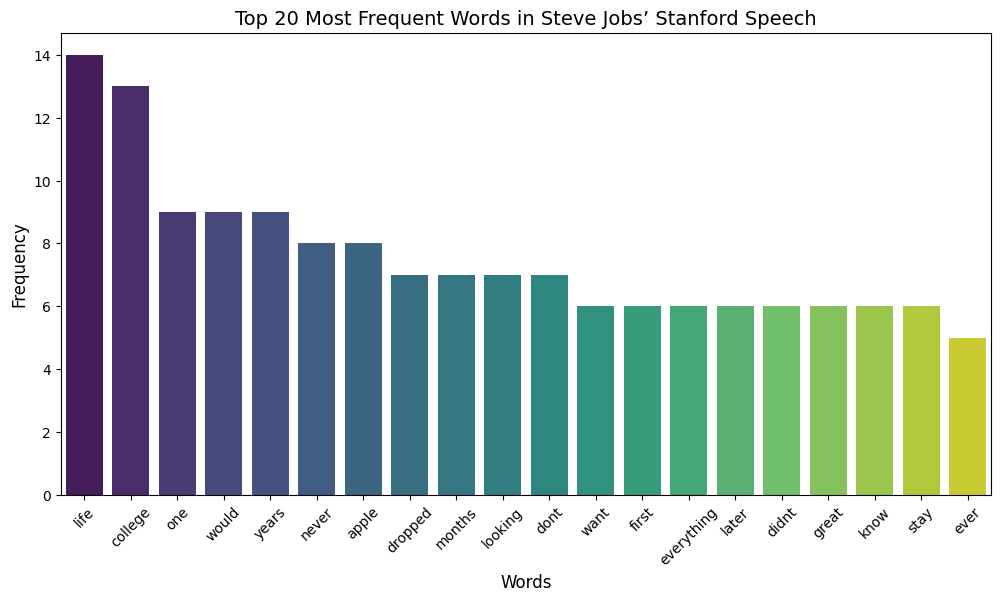

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the top 20 most common words and their counts
top_words, top_counts = zip(*word_counts.most_common(20))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_words), y=list(top_counts), palette="viridis")

plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Top 20 Most Frequent Words in Steve Jobs’ Stanford Speech", fontsize=14)

plt.xticks(rotation=45)

plt.show()

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Compute sentiment scores for the entire speech
sentiment_scores = sia.polarity_scores(speech_text)

# Print sentiment scores
print("Sentiment Analysis Results:")
print(sentiment_scores)

Sentiment Analysis Results:
{'neg': 0.088, 'neu': 0.754, 'pos': 0.159, 'compound': 0.9996}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


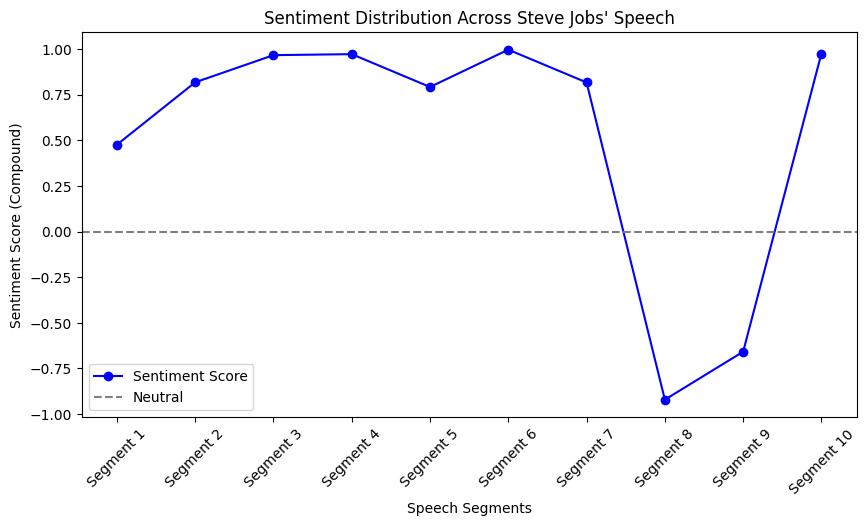

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Split speech into segments for sentiment analysis
def split_text(text, num_segments=10):
    words = text.split()
    segment_length = len(words) // num_segments
    segments = [" ".join(words[i * segment_length:(i + 1) * segment_length]) for i in range(num_segments)]
    return segments

num_segments = 10
speech_segments = split_text(speech_text, num_segments)

sentiment_values = [sia.polarity_scores(segment)["compound"] for segment in speech_segments]

segment_labels = [f"Segment {i+1}" for i in range(num_segments)]

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
plt.plot(segment_labels, sentiment_values, marker="o", linestyle="-", color="b", label="Sentiment Score")
plt.axhline(y=0, color="gray", linestyle="--", label="Neutral")
plt.xlabel("Speech Segments")
plt.ylabel("Sentiment Score (Compound)")
plt.title("Sentiment Distribution Across Steve Jobs' Speech")
plt.legend()
plt.xticks(rotation=45)
plt.show()

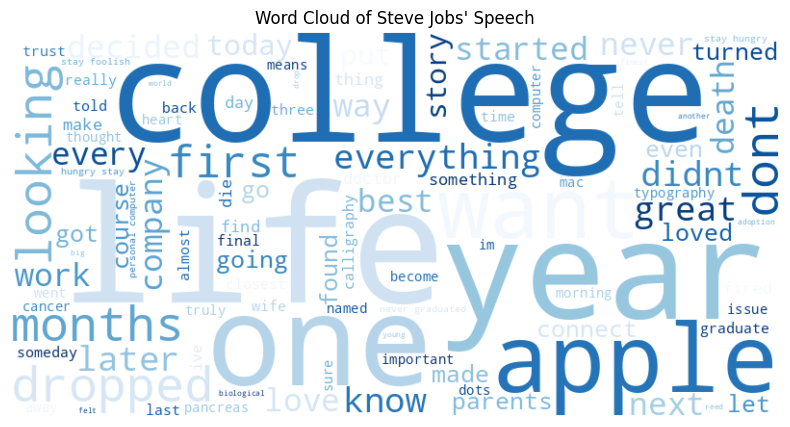

In [21]:
from wordcloud import WordCloud

# Generate word cloud from filtered tokens
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Blues", max_words=100).generate(" ".join(filtered_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Steve Jobs' Speech")
plt.show()

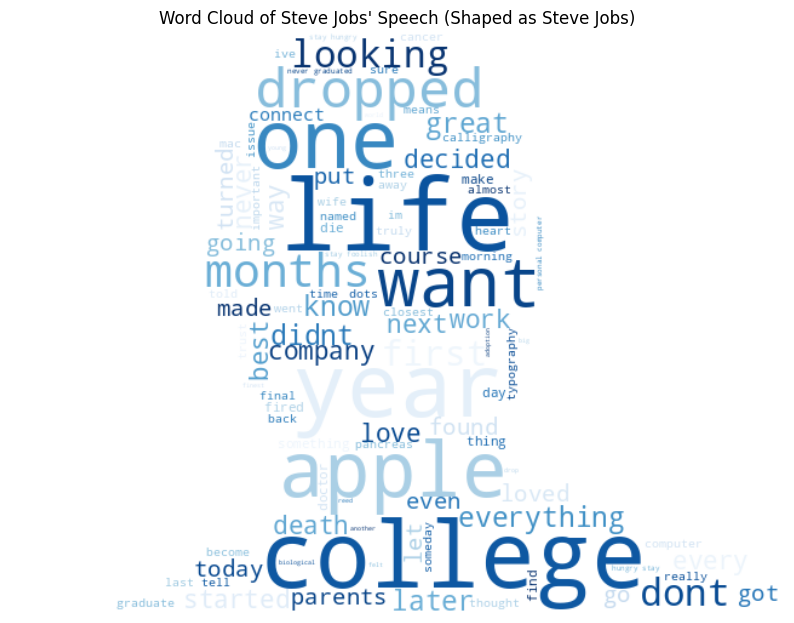

In [25]:
from PIL import Image
import numpy as np

# Load the image of Steve Jobs and convert it into a mask
mask_image = np.array(Image.open("steve_jobs.png"))

wordcloud_masked = WordCloud(width=800, height=400, background_color="white",
                             colormap="Blues", max_words=100, mask=mask_image).generate(" ".join(filtered_tokens))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_masked, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Steve Jobs' Speech (Shaped as Steve Jobs)")
plt.show()

In [19]:
from textblob import TextBlob

# Perform sentiment analysis
speech_blob = TextBlob(speech_text)
sentiment_score = speech_blob.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)
subjectivity_score = speech_blob.sentiment.subjectivity  # Returns a value between 0 (objective) and 1 (subjective)

print(f"Sentiment Score: {sentiment_score:.3f}")
print(f"Subjectivity Score: {subjectivity_score:.3f}")

Sentiment Score: 0.183
Subjectivity Score: 0.489
